In [1]:
from kiwipiepy import Kiwi
kiwi = Kiwi()
kiwi.load_user_dictionary('user_dictionary.txt')
kiwi.prepare()

In [2]:
import re

In [6]:
sarang = open('사랑 손님과 어머니.txt', encoding = 'UTF-8').read()

In [13]:
print(re.search('b','abc'))

<re.Match object; span=(1, 2), match='b'>


In [14]:
print(re.findall('c','cabc'))

['c', 'c']


In [17]:
print(re.split(' ','abc ab c'))

['abc', 'ab', 'c']


In [18]:
sarang = re.sub('[^가-힣]','',sarang)

In [20]:
kiwi.add_user_word('많관부', tag='NNP', score=0)

True

In [24]:
xxx= kiwi.tokenize('텍스트 내용')

In [25]:
xxx

[Token(form='텍스트', tag='NNG', start=0, len=3),
 Token(form='내용', tag='NNG', start=4, len=2)]

In [26]:
zxc=kiwi.tokenize('갸아아악 갸아악')

In [27]:
zxc

[Token(form='갸아아악', tag='NNG', start=0, len=4),
 Token(form='갸아악', tag='NNG', start=5, len=3)]

In [30]:
def extract_noun(text):
    result = kiwi.tokenize(text)
    for token in result:
        if token.tag in ['NNG', 'NNP']:
            yield token.form

In [34]:
non= list(extract_noun('갸아아악 갸아악 갸악 ㄱ ㅑ ㅇ ㅏ 악'))

In [35]:
non

['갸아아악', '갸아악', '갸악', '악']

In [36]:
import pandas as pd
words = pd.Series(non).value_counts().head(3)

In [37]:
words

갸아아악    1
갸아악     1
갸악      1
dtype: int64

In [40]:
saranglist = list(extract_noun(sarang))

In [41]:
saranglist

['사랑',
 '손',
 '어머니',
 '금년',
 '처녀',
 '애',
 '이름',
 '박옥희',
 '집',
 '식구',
 '세상',
 '어머니',
 '식구',
 '외삼촌',
 '중학교',
 '외삼촌',
 '집',
 '끼니때',
 '때',
 '외삼촌',
 '코빼기',
 '때',
 '예사',
 '어머니',
 '세상',
 '어머니',
 '금년',
 '나이',
 '과부',
 '과부',
 '동리',
 '사람',
 '과부',
 '딸',
 '어머니',
 '과부',
 '남',
 '아버지',
 '아버지',
 '아버지',
 '과부',
 '딸',
 '외할머니',
 '말씀',
 '아버지',
 '세상',
 '전',
 '어머니',
 '결혼',
 '아버지',
 '본집',
 '동리',
 '학교',
 '교사',
 '결혼',
 '후',
 '어머니',
 '시집',
 '집',
 '집',
 '외할머니',
 '댁',
 '옆집',
 '세상',
 '전',
 '아버지',
 '아버지',
 '얼굴',
 '생각',
 '아버지',
 '생각',
 '아버지',
 '사진',
 '사진',
 '얼굴',
 '아버지',
 '세상',
 '아버지',
 '아버지',
 '분',
 '일',
 '사진',
 '본지',
 '전',
 '사진',
 '어머니',
 '책상',
 '위',
 '외할머니',
 '때',
 '사진',
 '말씀',
 '지금',
 '사진',
 '한번',
 '어머니',
 '나',
 '동안',
 '장롱',
 '속',
 '장롱',
 '속',
 '아버지',
 '사진',
 '아버지',
 '전',
 '작년',
 '여름',
 '가을',
 '하루',
 '어머니',
 '산',
 '밤',
 '산',
 '밑',
 '초가집',
 '닭',
 '고깃국',
 '땅',
 '땅',
 '추수',
 '밥',
 '반찬',
 '과자',
 '돈',
 '어머니',
 '사람',
 '바느질',
 '바느질',
 '돈',
 '걸',
 '청어',
 '달걀',
 '사탕',
 '집',
 '식구',
 '어머니',
 '나',
 '아버님',
 '사랑방',
 '방',
 '어머니'

In [42]:
topwords = pd.Series(saranglist).value_counts().head(10)
topwords

어머니    167
아저씨     95
옥희      60
엄마      44
때       31
아버지     30
풍금      30
외삼촌     29
생각      28
사랑      26
dtype: int64

In [43]:
topwords.to_csv("sa.csv")

In [44]:
!pip install wordcloud

     -------------------------------------- 153.3/153.3 kB 4.6 MB/s eta 0:00:00


In [45]:
font = 'SUITE-Variable.ttf'

In [47]:
from wordcloud import WordCloud
wc = WordCloud(random_state = 1234, font_path = font, width = 400, height = 400,
background_color = 'white')

In [48]:
wc

In [50]:
cloudword = words.to_dict()
img_wordcloud = wc.generate_from_frequencies(cloudword)

In [51]:
import matplotlib.pyplot as plt

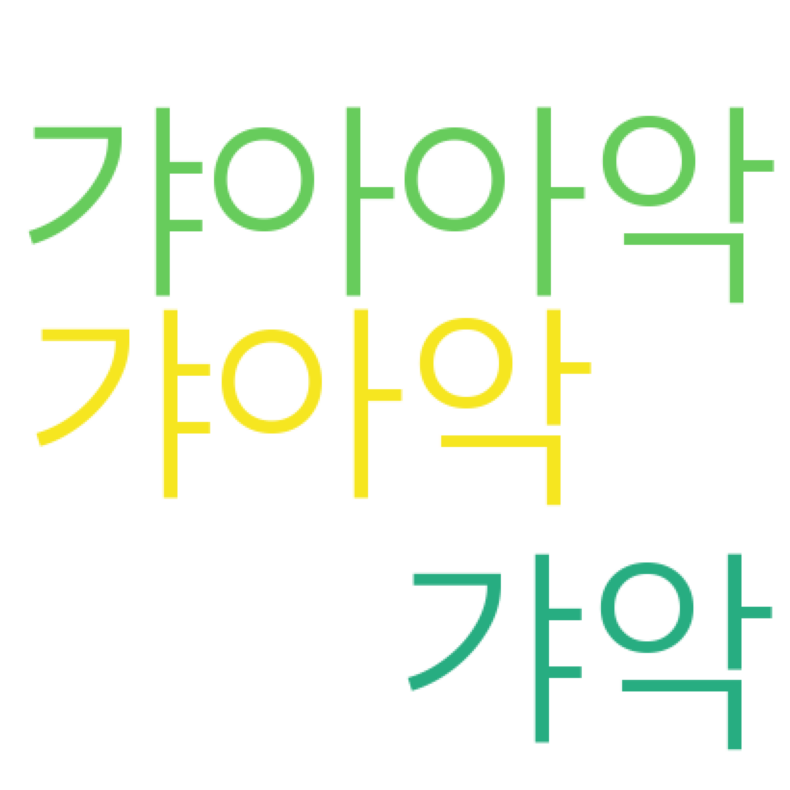

In [52]:
plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(img_wordcloud)

In [53]:
cloudword

{'갸아아악': 1, '갸아악': 1, '갸악': 1}

In [54]:
cloudword = topwords.to_dict()
img_wordcloud = wc.generate_from_frequencies(cloudword)

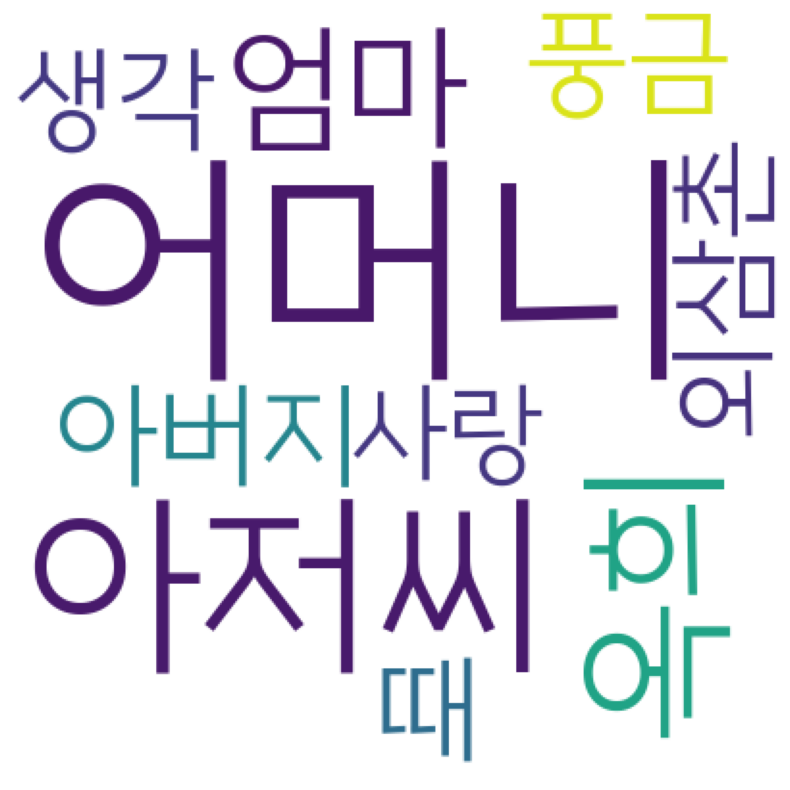

In [55]:
plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(img_wordcloud)